# Content

1. [Load and Check Data](#1)
1. [Veriable Description](#2)
1. [Checking Missing Values](#3)
1. [Analysing The Features](#4)
    * [Categorical Variable Analysis](#5)
        * [Sex](#6)
        * [Pclass](#7)
        * [SibSp](#8)
        * [Parch](#9)
        * [Embarked](#10)
    * [Numerical Variable Analysis](#11)
        * [Age](#12)
        * [Fare](#13)
1. [Filling Missing Values](#14)
    * [Filling Age Feature](#15)
    * [Filling Embarked Feature](#16)
    * [Filling Fare Feature](#17)
1. [Label Encoding](#18)
1. [Modeling](#19)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

<a id='1'></a><br>
# Load and Check Data

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a><br>
# Veriable Description

Feature Name   | Description
---------------|-------------
PassengerId    | Specific passenger number
Survived       | Survived (1) or died (0)
Pclass         | Passenger's class
Name           | Passenger's name
Sex            | Passenger's gender
Age            | Passenger's age
SibSp          | Number of siblings/spouses on board
Parch          | Number of parents/children on board
Ticket         | Ticket number
Fare           | Fare
Cabin          | Passenger's Cabin
Embarked       | Embarkation port

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id='3'></a><br>
# Checking Missing Values

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

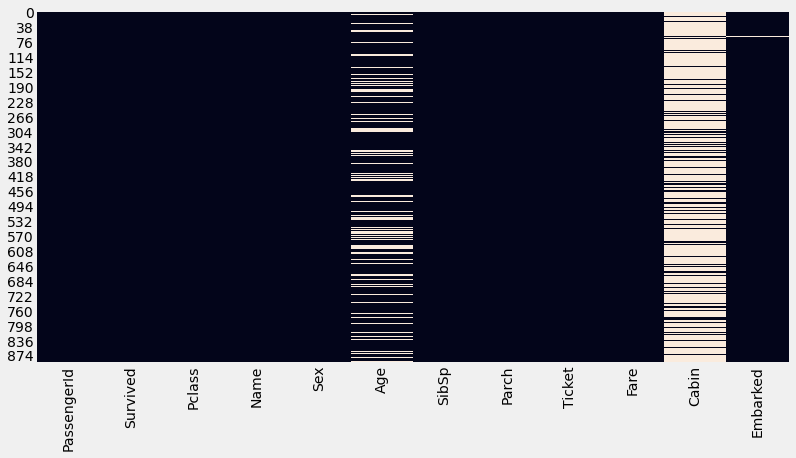

In [8]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cbar=False)
plt.show()

> * As you can see, there are NaN values in the Age and Embarked properties.
> * Let's examine the features in the data set one by one. And let's try to fill in these NaN values at the end of the review.

<a id='4'></a><br>
# Analysing The Features

* Categorical Variables : Survived, Pclass, Name, Sex, SibSp, Parch ,Ticket, Embarked
* Numerical Variables   : PassengerId, Age, Fare

> * Let's look at the correlation map before starting to examine our features. Then we will examine them one by one.

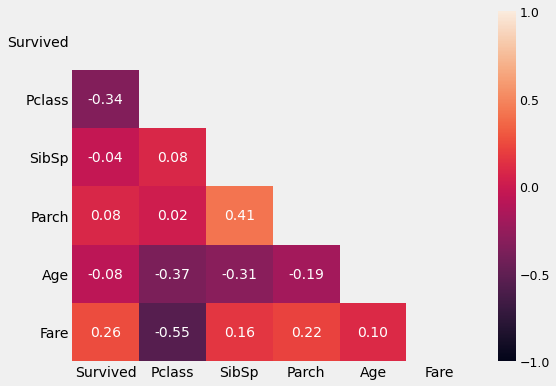

In [9]:
features = ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
mask = np.triu(np.ones_like(train_df[features].corr(), dtype=np.bool))
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax = sns.heatmap(train_df[features].corr() , mask = mask , annot = True, fmt='.2f', vmin=-1.0, vmax=1.0, cbar_kws=dict(ticks=[-1.0, -0.5, 0.00, 0.50, 1.0]))
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12.5)
plt.show()

<a id='5'></a><br>
## Categorical Variable Analysis

> * First of all, let's have a look how many passengers survived.

<a id='6'></a><br>
### 1. Sex

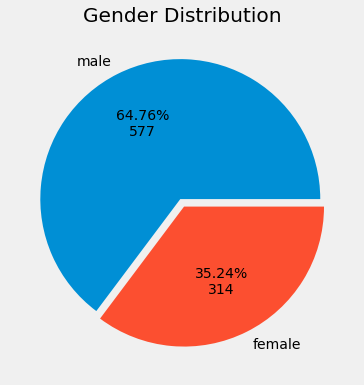

In [10]:
sizes = train_df['Sex'].value_counts()
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n{v:d}'.format(p=pct, v=val)
    return my_autopct

fig ,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.pie(sizes, labels=sizes.index, autopct=make_autopct(sizes), explode=[0.03,0.03])
ax.set_title('Gender Distribution')
plt.show()

> * As you can see, the number of men on the ship is much more than women.

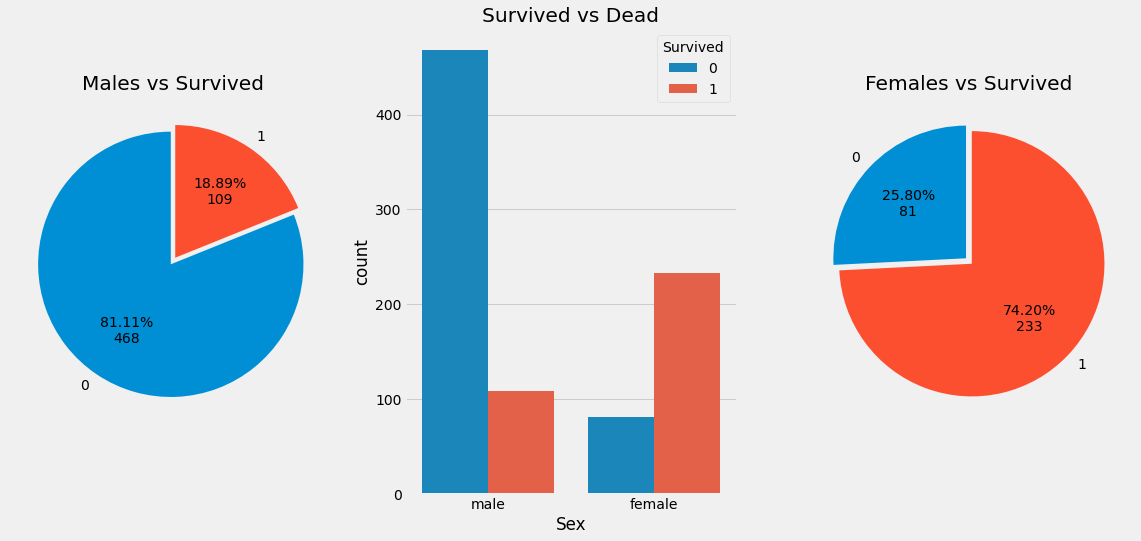

In [11]:
size_male  = train_df[train_df['Sex']== 'male']['Survived'].value_counts()
size_female =train_df[train_df['Sex']== 'female']['Survived'].value_counts()[::-1]
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
ax[0].pie(size_male, labels=size_male.index, autopct=make_autopct(size_male), explode=[0.03,0.03], startangle=90)
sns.countplot('Sex',hue='Survived',data=train_df,ax=ax[1])
ax[2].pie(size_female, labels=size_female.index, autopct=make_autopct(size_female), explode=[0.03,0.03], startangle=90)
ax[0].set_title('Males vs Survived')
ax[1].set_title('Survived vs Dead')
ax[2].set_title('Females vs Survived')
plt.show()

> * We've seen a lot more men on the ship.
> * Despite this, the number of women saved is almost twice the number of males saved.
> * The survival rates for a women on the ship is around **74-75%** while that for men in around **18-19%**.

In [12]:
train_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


<a id='7'></a><br>
### 2. Pclass

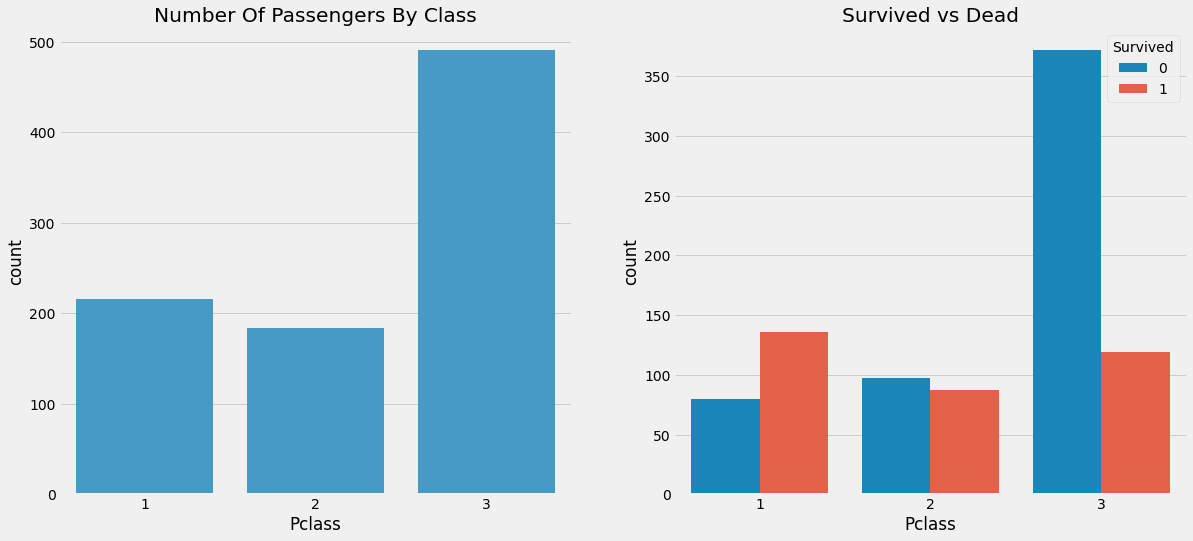

In [13]:
fig ,ax =plt.subplots(nrows=1, ncols=2, figsize=(18,8))

sns.countplot(x='Pclass', data=train_df, ax=ax[0], color='#30A2DA')
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=ax[1])

ax[0].set_title('Number Of Passengers By Class')
ax[1].set_title('Survived vs Dead')
plt.show()

> * As can be seen, the number of 3rd class passengers is quite higher than the others. However, it is not possible to say the same for the number of surviving passengers.
> * The survival rate of 1st class passengers is around 63%, 2nd class passengers 48% and 3rd class passengers 25%.
> * Let's add the gender factor to these graphs.

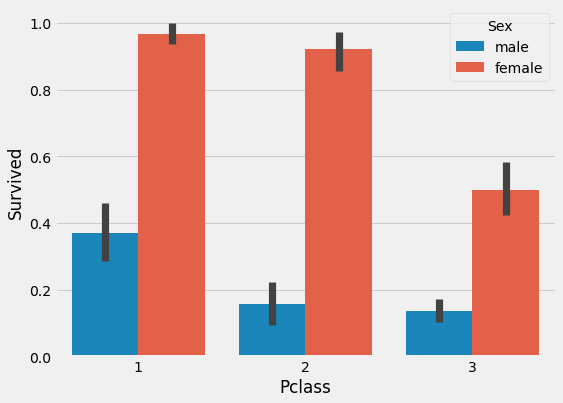

In [14]:
fig ,ax =plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df, ax=ax)
plt.show()

> * Among 1st and 2nd class passengers, the survival rate of women is really high.
> * But regardless of class, the survival rate of men is much lower than that of women.

<a id='8'></a><br>
### SibSp

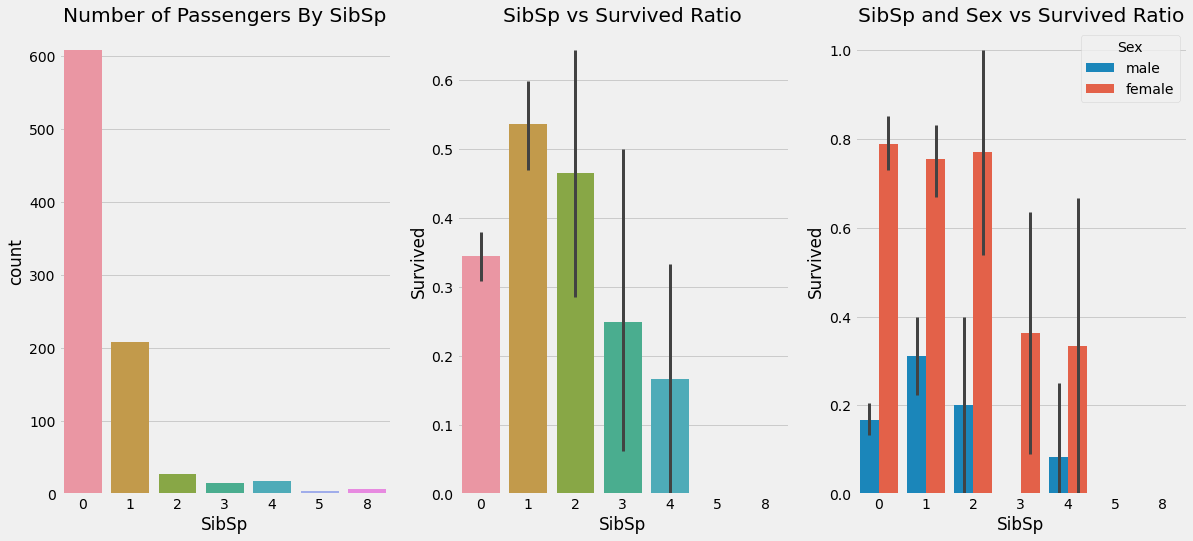

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x='SibSp', data=train_df, ax=ax[0])
sns.barplot(x='SibSp', y='Survived', data=train_df, ax=ax[1], errwidth=3)
sns.barplot(x='SibSp', y='Survived', hue='Sex',data=train_df, ax=ax[2], errwidth=3)
ax[0].set_title('Number of Passengers By SibSp')
ax[1].set_title('SibSp vs Survived Ratio')
ax[2].set_title('SibSp and Sex vs Survived Ratio')
plt.show()

<a id='9'></a><br>
### Parch

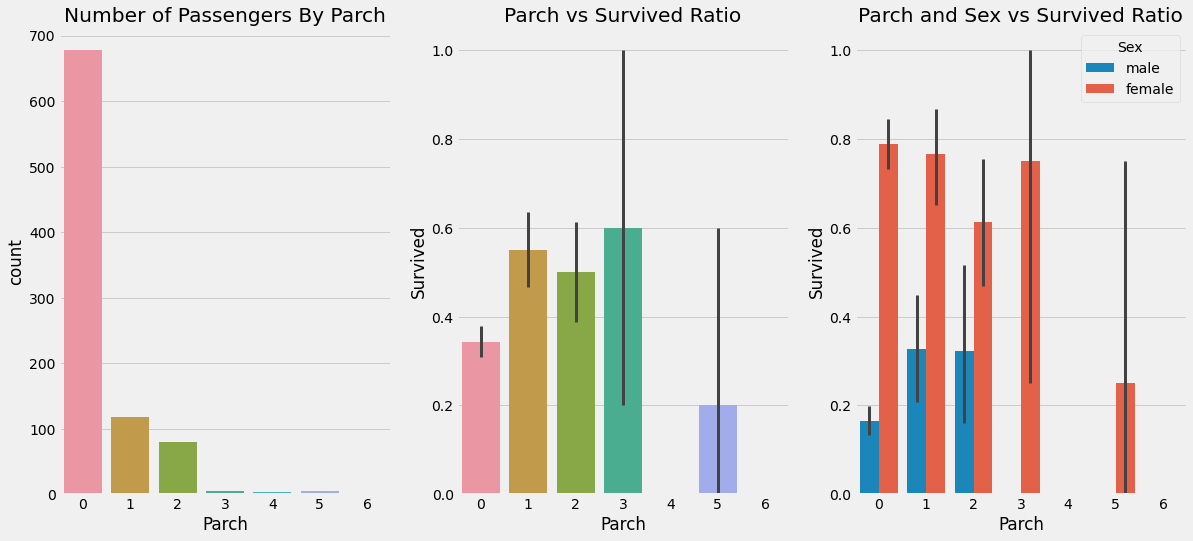

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x='Parch', data=train_df, ax=ax[0])
sns.barplot(x='Parch', y='Survived', data=train_df, ax=ax[1], errwidth=3)
sns.barplot(x='Parch', y='Survived', hue='Sex',data=train_df, ax=ax[2], errwidth=3, )
ax[2].legend(loc='upper right', title='Sex')
ax[0].set_title('Number of Passengers By Parch')
ax[1].set_title('Parch vs Survived Ratio')
ax[2].set_title('Parch and Sex vs Survived Ratio')
plt.show()

<a id='10'></a><br>
### Embarked

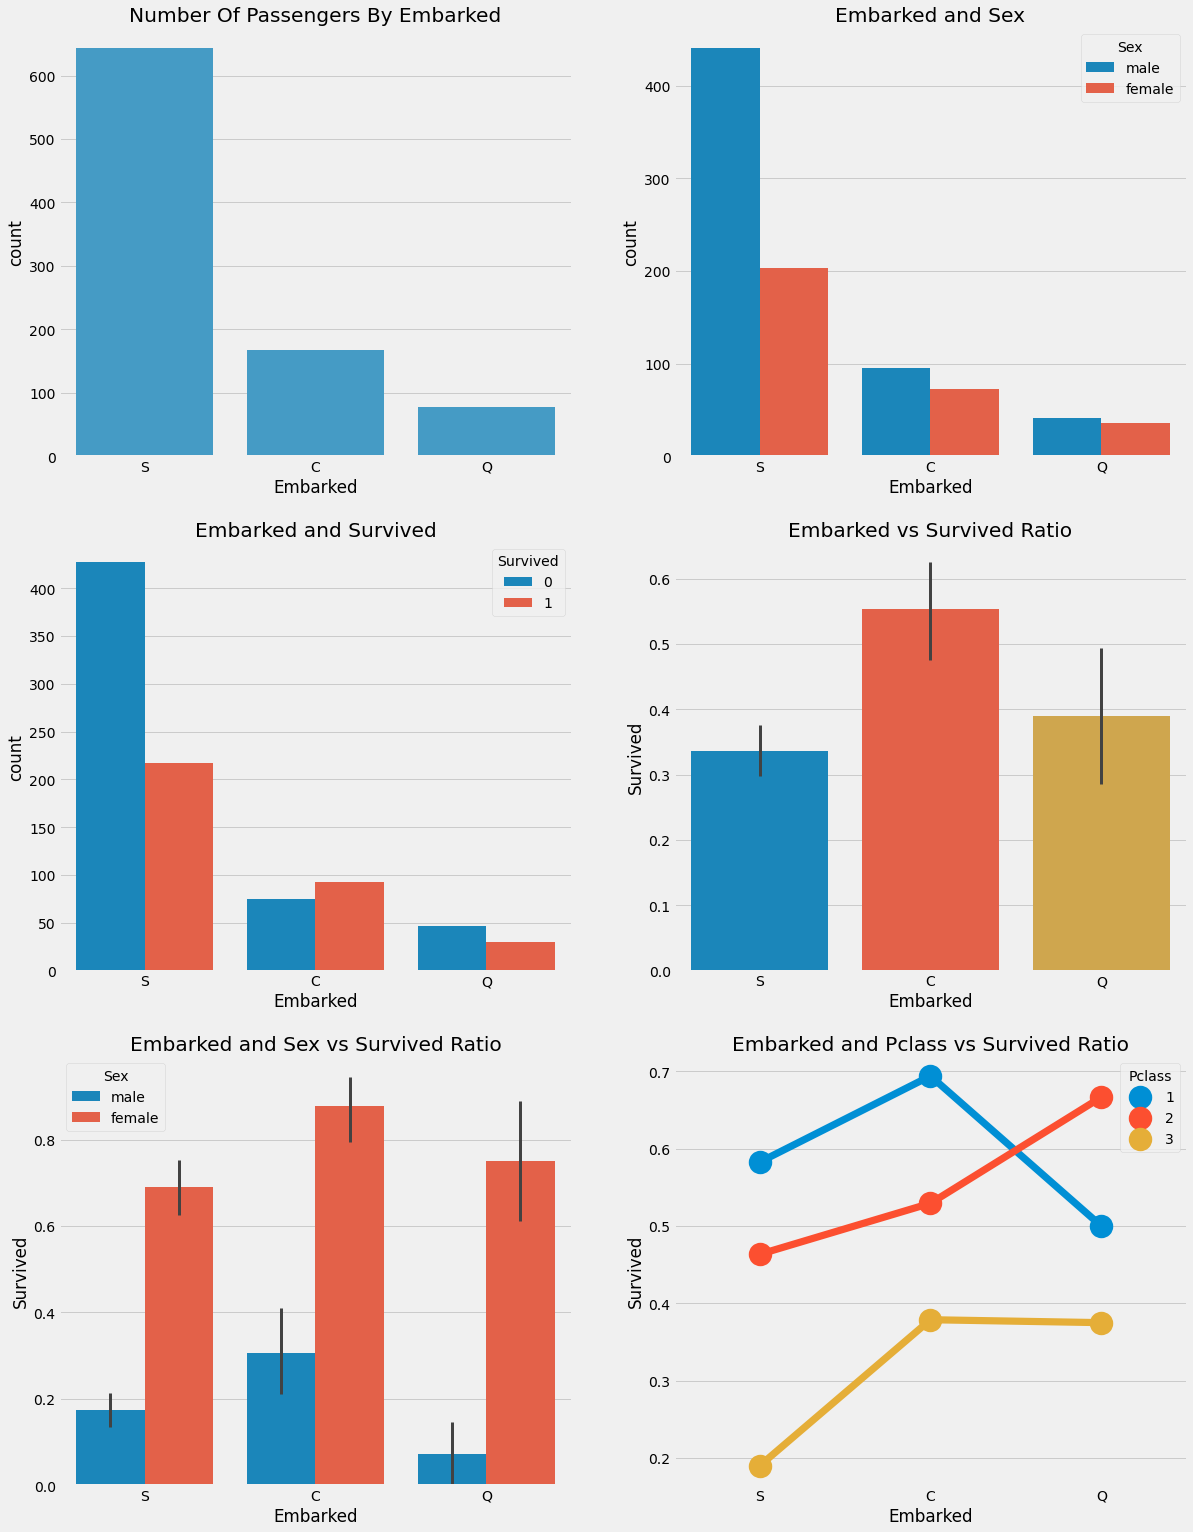

In [17]:
fig ,ax =plt.subplots(nrows=3, ncols=2, figsize=(18,25))

sns.countplot(x='Embarked', data=train_df, ax=ax[0,0], color='#30A2DA')
sns.countplot(x='Embarked', hue='Sex', data=train_df, ax=ax[0,1])
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1,0])
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=ax[1,1], errwidth=3)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_df, ax=ax[2,0], errwidth=3)
sns.pointplot(data=train_df, x="Embarked",y="Survived",hue="Pclass", ax=ax[2,1], ci=0)


ax[0,0].set_title('Number Of Passengers By Embarked')
ax[0,1].set_title('Embarked and Sex')
ax[1,0].set_title('Embarked and Survived')
ax[1,1].set_title('Embarked vs Survived Ratio')
ax[2,0].set_title('Embarked and Sex vs Survived Ratio')
ax[2,1].set_title('Embarked and Pclass vs Survived Ratio')
plt.show()

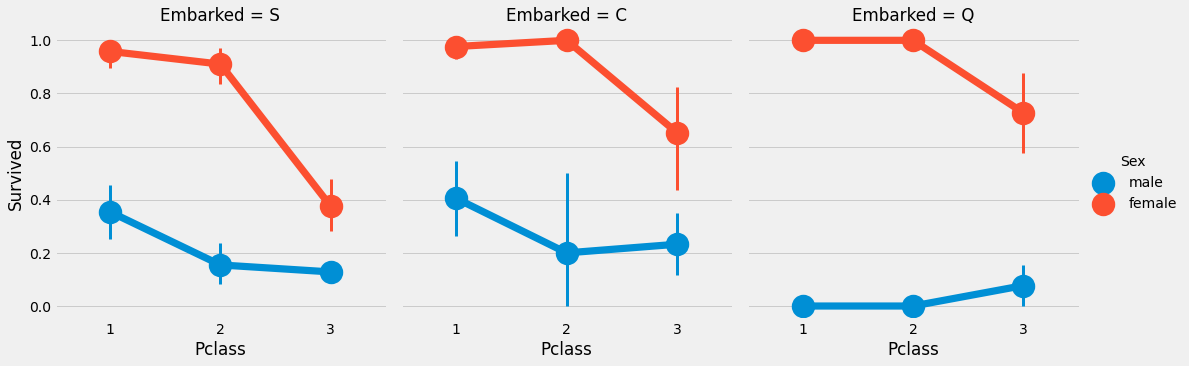

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df, errwidth=3)
plt.show()

<a id='11'></a><br>
## Numerical Variable Analysis

<a id='12'></a><br>
### Age

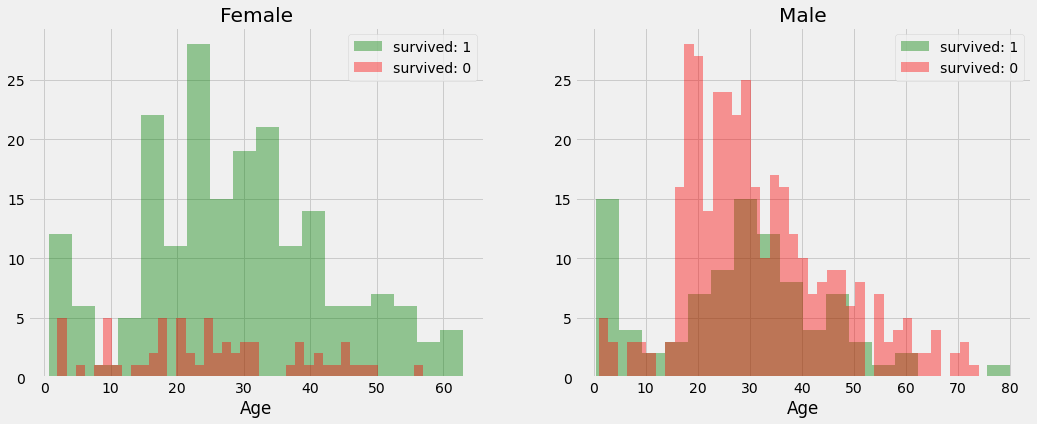

In [19]:
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))

sns.distplot(female[female['Survived']==1].Age.dropna(), bins=18, label='survived: 1', ax=ax[0], kde=False, color="green")
sns.distplot(female[female['Survived']==0].Age.dropna(), bins=40, label='survived: 0', ax=ax[0], kde=False, color="red")

sns.distplot(male[male['Survived']==1].Age.dropna(), bins=18, label ='survived: 1', ax=ax[1], kde=False, color="green")
sns.distplot(male[male['Survived']==0].Age.dropna(), bins=40, label ='survived: 0', ax=ax[1], kde=False, color="red")
ax[0].legend()
ax[1].legend()
ax[0].set_title('Female')
ax[1].set_title('Male')
plt.show()

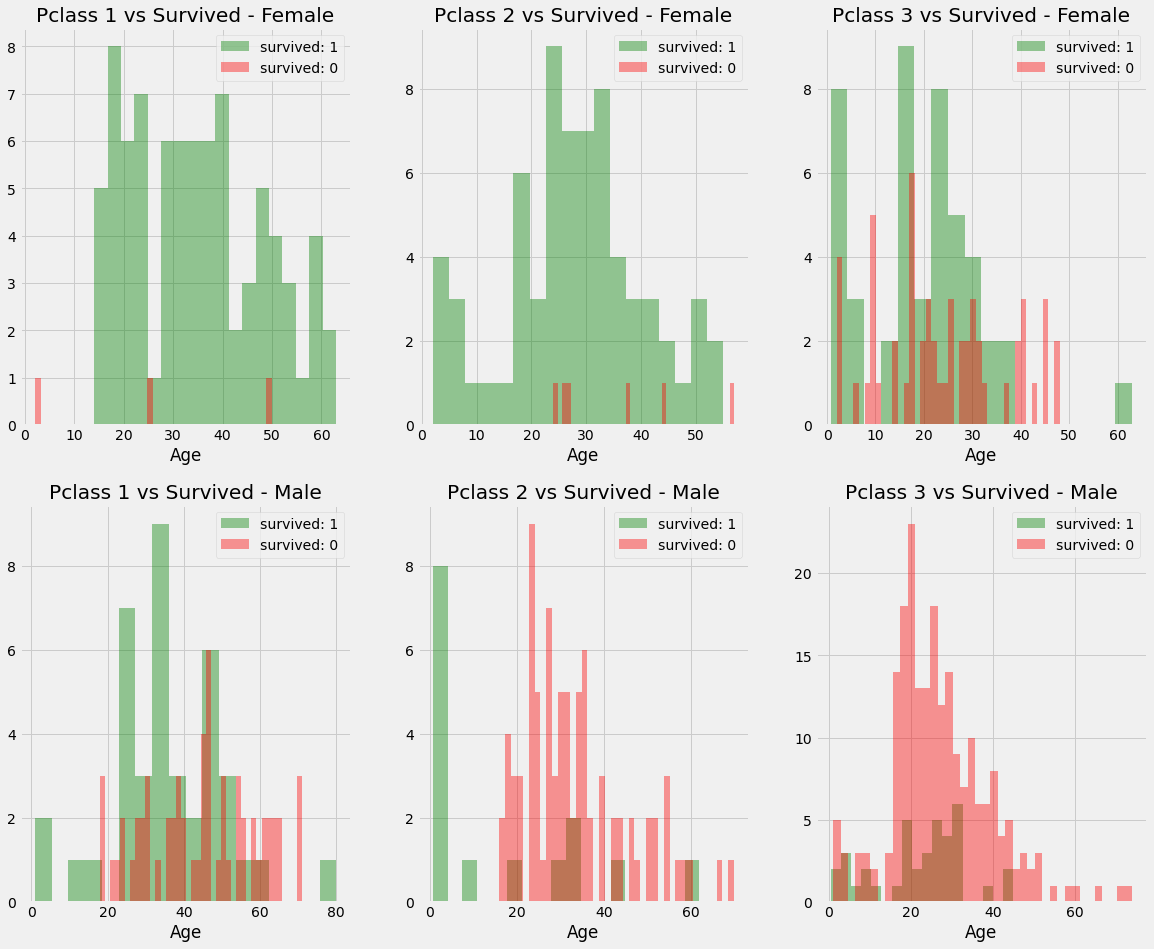

In [20]:
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']

def draw_plot(df1, df2, i):
    sns.distplot(df1[(df1['Survived']==1) & (df1['Pclass']==i+1)].Age.dropna(), bins=18, label='survived: 1', ax=ax[0,i], kde=False, color="green")
    sns.distplot(df1[(df1['Survived']==0) & (df1['Pclass']==i+1)].Age.dropna(), bins=40, label='survived: 0', ax=ax[0,i], kde=False, color="red")  
    sns.distplot(df2[(df2['Survived']==1) & (df2['Pclass']==i+1)].Age.dropna(), bins=18, label='survived: 1', ax=ax[1,i], kde=False, color="green")
    sns.distplot(df2[(df2['Survived']==0) & (df2['Pclass']==i+1)].Age.dropna(), bins=40, label='survived: 0', ax=ax[1,i], kde=False, color="red")
    
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(18, 15))
for i in range(3):
    draw_plot(female, male, i)
    ax[0,i].legend(loc='upper right')
    ax[1,i].legend(loc='upper right')
    ax[0,i].set_title('Pclass {} vs Survived - Female'.format(i+1))
    ax[1,i].set_title('Pclass {} vs Survived - Male'.format(i+1))
plt.show()

> * It seems that the survival rate at young ages is really high.

<a id='13'></a><br>
### Fare

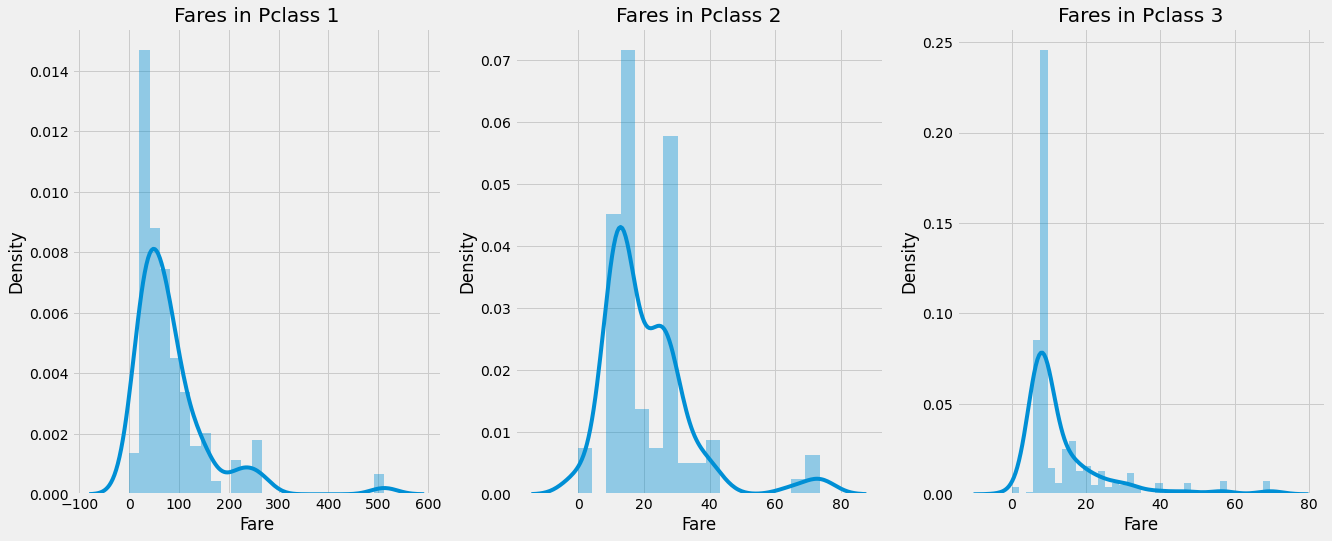

In [21]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(20,8))
sns.distplot(train_df[train_df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

<a id='14'></a><br>
# Filling Missing Values

In [22]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
train_df_len = len(train_df)
df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
342,343,0.0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
660,661,1.0,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
127,128,1.0,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
116,117,0.0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
130,131,0.0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
1148,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
1116,1117,NaN,3,"Moubarek, Mrs. George (Omine Amenia"" Alexander)""",female,NaN,0,2,2661,15.2458,NaN,C
618,619,1.0,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
1206,1207,NaN,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q
877,878,0.0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S


* Now that we have examined our properties, let's try to fill in the NaN values.
* Let's take a look again

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id='15'></a><br>
### Filling Age Feature

In [25]:
df['Appellation']=0
for i in df:
    df['Appellation']=df.Name.str.extract('([A-Za-z]+)\.')
df['Appellation'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Other'],inplace=True)
df['Appellation'].value_counts()

Mr        770
Miss      265
Mrs       199
Master     61
Other      14
Name: Appellation, dtype: int64

In [26]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


* We filtered the appellations. I think we can take advantage of this to fill the Age section.

In [27]:
df.groupby('Appellation')['Age'].mean()

Appellation
Master     5.482642
Miss      21.834533
Mr        32.545531
Mrs       37.034884
Other     44.500000
Name: Age, dtype: float64

In [28]:
df.loc[(df.Age.isnull())&(df.Appellation=='Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Appellation=='Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Appellation=='Mr'),'Age']=33
df.loc[(df.Age.isnull())&(df.Appellation=='Mrs'),'Age']=37
df.loc[(df.Age.isnull())&(df.Appellation=='Other'),'Age']=45

In [29]:
df['Age'].isnull().any()

False

<a id='16'></a><br>
### Filling Embarked Feature

In [30]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


* The first thing that strikes me with these people is that the fare part is quite high. Let's go over this point.

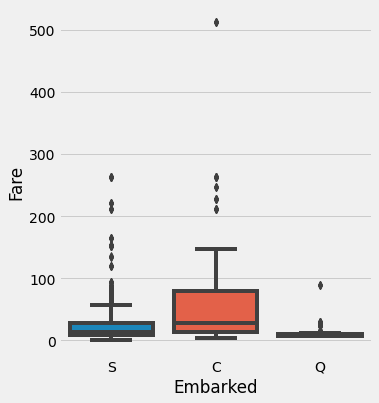

In [31]:
fig = plt.figure(figsize=(5, 6))
sns.boxplot(y="Fare",x = "Embarked", data=df)
plt.show()

* As can be seen, option C looks very suitable for us.

In [32]:
df["Embarked"] = df["Embarked"].fillna("C")
df["Embarked"].isnull().any()

False

<a id='17'></a><br>
### Filling Fare Feature

In [33]:
df[df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr


In [34]:
df["Fare"] = df["Fare"].fillna(np.mean(df[df["Pclass"] == 3]["Fare"]))
df["Fare"].isnull().any()

False

In [35]:
df.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Appellation    False
dtype: bool

<a id='18'></a><br>
# Label Encoding

In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [37]:
df = df.drop(['Name', "PassengerId", "Ticket", "Cabin"], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Appellation
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df["Sex"])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Appellation'] = le.fit_transform(df["Appellation"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Appellation
0,0.0,3,1,22.0,1,0,7.2500,2,2
1,1.0,1,0,38.0,1,0,71.2833,0,3
2,1.0,3,0,26.0,0,0,7.9250,2,1
3,1.0,1,0,35.0,1,0,53.1000,2,3
4,0.0,3,1,35.0,0,0,8.0500,2,2


<a id='19'></a><br>
# Modeling

In [39]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### train_test_split

In [40]:
train_df_len

891

In [41]:
test = df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Appellation
891,3,1,34.5,0,0,7.8292,1,2
892,3,0,47.0,1,0,7.0000,2,3
893,2,1,62.0,0,0,9.6875,1,2
894,3,1,27.0,0,0,8.6625,2,2
895,3,0,22.0,1,1,12.2875,2,3


In [43]:
train = df[:train_df_len]
x = train.drop(labels = "Survived", axis = 1)
y = train["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

x_train 757
x_test 134
y_train 757
y_test 134
test 418


In [44]:
result_dict = {}

### Logistic Regression

In [45]:
logreg = LogisticRegression(C=0.04)
logreg.fit(x_train, y_train)

result_dict["Logistic Regression"] = logreg.score(x_test, y_test)

logreg.score(x_test, y_test)

0.8432835820895522

### KNN Classification

In [46]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train, y_train)

result_dict["KNN Classification"] = knn.score(x_test, y_test)

knn.score(x_test, y_test)

0.7835820895522388

### SVM Classification

In [47]:
svm = SVC(random_state=1, gamma=0.006, C=11, kernel="rbf")
svm.fit(x_train, y_train)

result_dict["SVM Classification"] = svm.score(x_test, y_test)

svm.score(x_test, y_test)

0.835820895522388

### Decision Tree Classification

In [48]:
d_tree = DecisionTreeClassifier(random_state=6, max_depth=10, min_samples_split=2)
d_tree.fit(x_train, y_train)

result_dict["Decision Tree Classification"] = d_tree.score(x_test, y_test)

d_tree.score(x_test, y_test)

0.8507462686567164

### Random Forest Classification

In [49]:
rf = RandomForestClassifier(
    max_features= 5, 
    min_samples_split= 6,
    min_samples_leaf=1,
    n_estimators= 700,
    random_state=42
    )

rf.fit(x_train, y_train)

result_dict["Random Forest Classification"] = rf.score(x_test, y_test)

rf.score(x_test, y_test)

0.8582089552238806

In [50]:
results_df = pd.DataFrame(data=result_dict.values(), index=result_dict.keys(), columns= ["accuracy score"])
results_df.sort_values(by="accuracy score", ascending=False)

,accuracy score
Random Forest Classification,0.858209
Decision Tree Classification,0.850746
Logistic Regression,0.843284
SVM Classification,0.835821
KNN Classification,0.783582


### Ensemble Modeling

In [51]:
votingC = VotingClassifier(estimators = [("dt",d_tree),
                                        ("rfc",rf),
                                        ("lr",logreg)],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8731343283582089


### Prediction and Submission

In [52]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)